# Energy Data

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
# set option to display the all columns
pd.set_option("display.max_columns", 29)


In [3]:
df = pd.read_csv("energydata.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df["date"] = pd.to_datetime(df["date"])


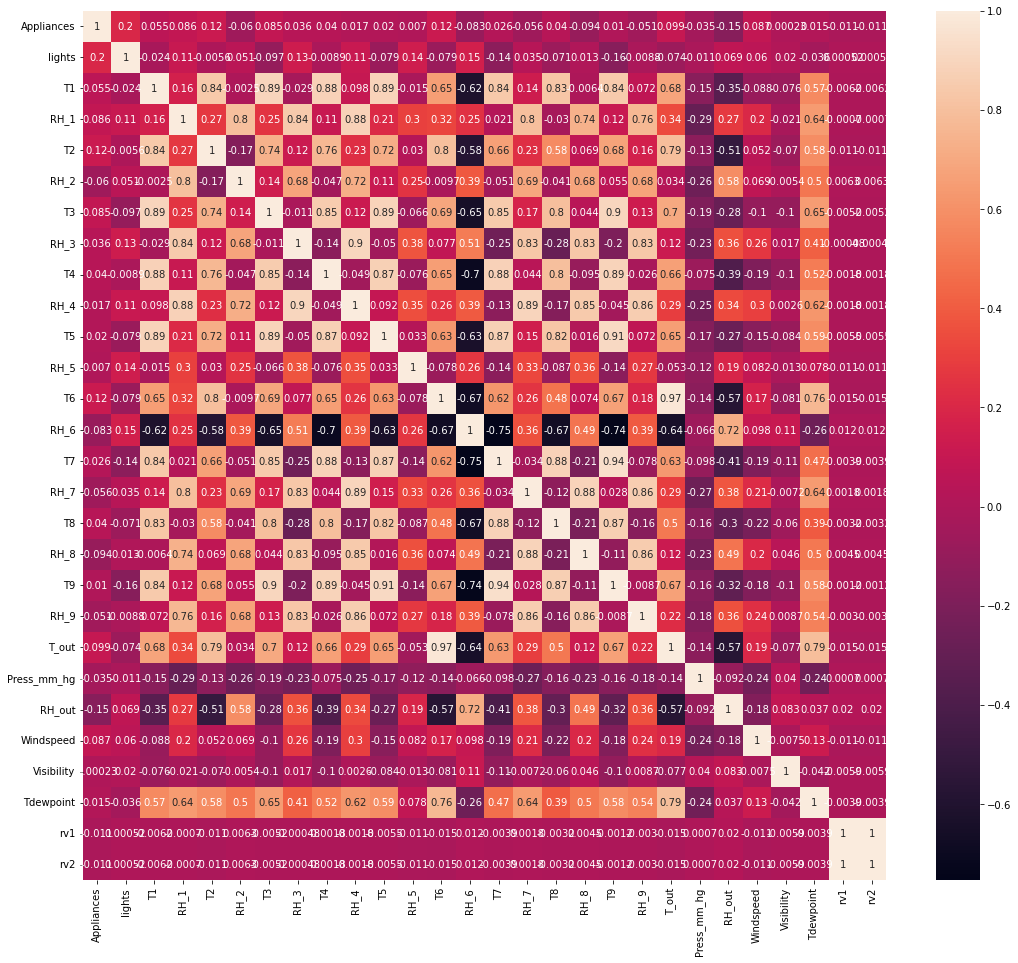

In [6]:
# checking for multiconlinearity

plt.figure(figsize=(18, 16))

cor = df.select_dtypes("number").corr()
sns.heatmap(cor, annot=True)
plt.show()

##### Train Test Split

In [7]:
target = df["T6"]
features = df["T2"]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# reshaping the data because am ruuning regression on single features
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [9]:
# fitting the linear regression model

model_reg = LinearRegression()
model_reg.fit(x_train,y_train)

LinearRegression()

In [10]:
# making the x_test prediction

y_pred = model_reg.predict(x_test)

In [11]:
# checking the Root Mean Squared Error Values

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f"RMSE: {RMSE:.3f}")

RMSE: 3.612


In [12]:
df2 = df.drop(columns=["date","lights","Appliances"], axis=1)


In [13]:
df2

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


### Normalized

In [16]:
# Normalised the data and drop off some columns and spliting the data

scaler = MinMaxScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)

x = scaled_data
y = df["Appliances"]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state=1)

#### LinearRegression

In [18]:
# fittin the data into the model

model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [19]:
# getting the test data prediction

y_predic = model2.predict(x_test)

In [21]:
# Calculating the mean absolute error

MAE = mean_absolute_error(y_test, y_predic)
print(f"MAE: {MAE:.3f}")

MAE: 53.583


In [22]:
# calulating the mean squared error

MSE2 = mean_squared_error(y_test, y_predic)

RSME = np.sqrt(MSE2)

print(f"RSME: {RSME:.3f}")

RSME: 94.411


#### RIDGE

In [26]:
#Ridge

model2 = Ridge(alpha=0.5)
model2.fit(x_train, y_train)

Ridge(alpha=0.5)

In [27]:
# Getting preediction 

R_predict = model2.predict(x_test)

# Calculating the mean squared error
R_MSE = mean_squared_error(y_test, R_predict)

# Caluclating Root mean squared error
R_RMSE = np.sqrt(R_MSE)

print(f"Ridge RMSE: {R_RMSE:.3f}")

Ridge RMSE: 94.440


#### LASSO

In [30]:
model3 = Lasso(alpha=0.5)
model3.fit(x_train, y_train)

Lasso(alpha=0.5)

In [35]:
# obtaining the feature coefficinets

coef = model3.coef_

# sum the number of coefficients with number errors.

non_zero = sum(coef != 0)

print(f" zero Features: {non_zero}")


 zero Features: 8


In [32]:
# getting the prediction

L_predict = model3.predict(x_test)

# Calculating mean squared error
L_MSE = mean_squared_error(y_test, L_predict)

# calculating the root mean squared error
L_RSME = np.sqrt(L_MSE)

print(f"Lasso RMSE: {L_RSME:.3f}")

Lasso RMSE: 98.161
